# Verify the platform by comparing the figures

In [1]:
using Unitful
import PhysicalConstants.CODATA2022:ħ,k_B
using CairoMakie
using FileIO
using QuantumToolbox
include("../scripts/infidelities_funnctions.jl");

In [2]:
function latex_sci(x)
    if x == 0
        return "0"
    end
    xf = Float64(x)
    sign = xf < 0 ? "-" : ""
    xf = abs(xf)

    exp = floor(Int, log10(xf))               # base-10 exponent
    coeff = round(xf / 10.0^exp, sigdigits=3) # normalized coefficient

    if coeff == 1
        return "$sign 10^{$(exp)}"
    else
        return "$sign $(coeff) \times 10^{$(exp)}"
    end
end

latex_sci (generic function with 1 method)

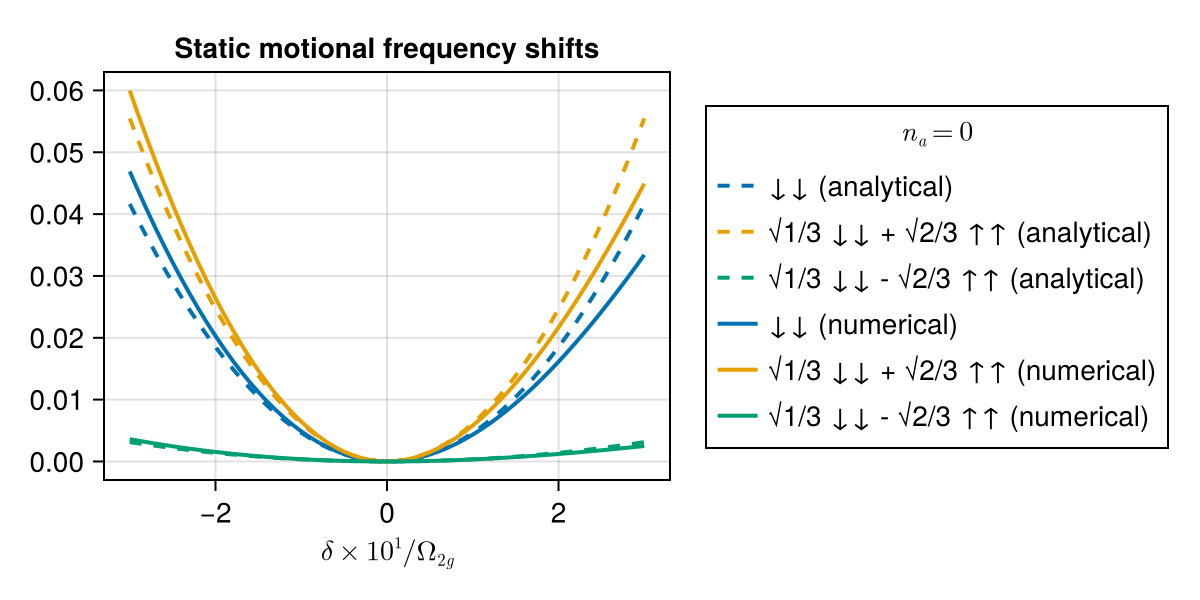

In [3]:
N = 30  
na=0
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-1
δ=(-3:0.1:3)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\delta \times %$(latex_sci(1/param_scale))/ \Omega_{2g}",title="Static motional frequency shifts")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_static_motional_shift(δ,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for δ in δ]
    lines!(ax,δ/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_static_motional_shift_numerical(1,δ,ψ0, progress_bar=Val(false))) for δ in δ]
    lines!(ax,δ/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Static motional frequency shifts n_a=$na.svg", fig)
fig


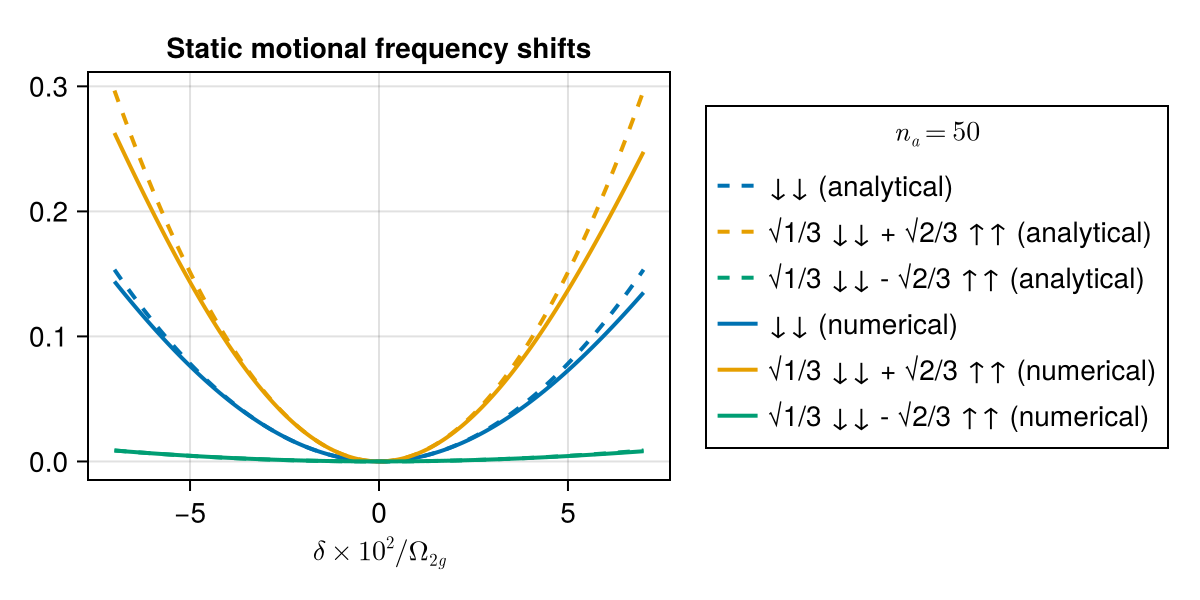

In [4]:
N = 80  
na=50
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-2
δ=(-7:0.1:7)*param_scale
Ω=1
Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\delta \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Static motional frequency shifts")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_static_motional_shift(δ,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for δ in δ]
    lines!(ax,δ/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_static_motional_shift_numerical(1,δ,ψ0, progress_bar=Val(false))) for δ in δ]
    lines!(ax,δ/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Static motional frequency shifts n_a=$na.svg", fig)
fig

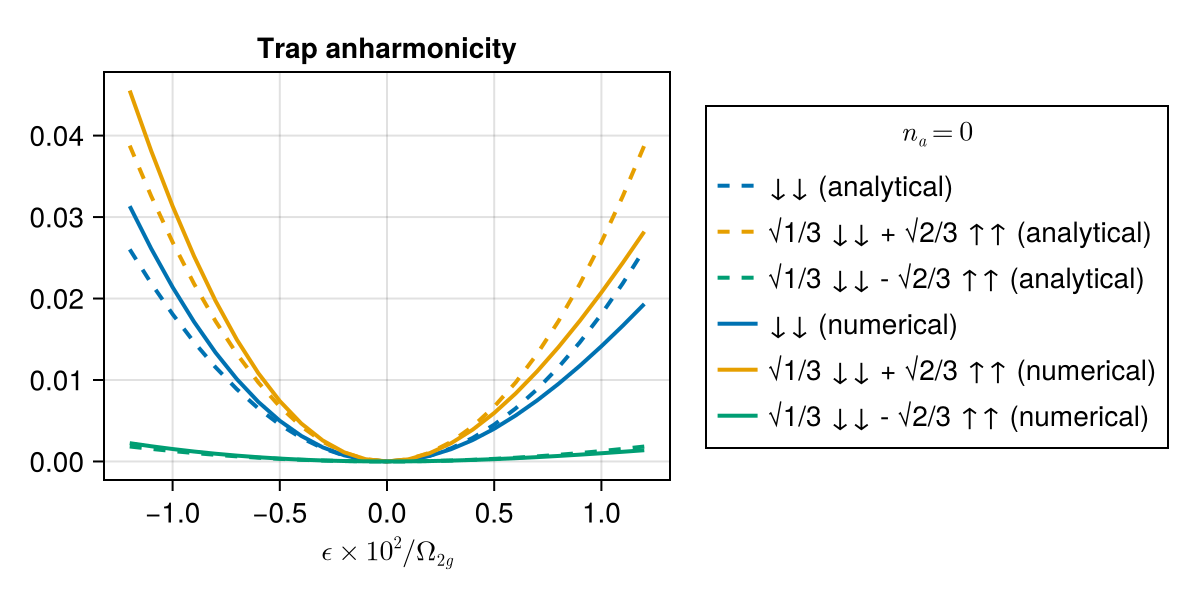

In [5]:
N = 30  
na=0
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]

param_scale=1e-2

ϵ=(-1.2:0.1:1.2)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\epsilon \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Trap anharmonicity")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_trap_anharmonicity(ϵ,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for ϵ in ϵ]
    lines!(ax,ϵ/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_trap_anharmonicity_numerical(1,ϵ,ψ0, progress_bar=Val(false))) for ϵ in ϵ]
    lines!(ax,ϵ/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Trap anharmonicity n_a=$na.svg", fig)

fig

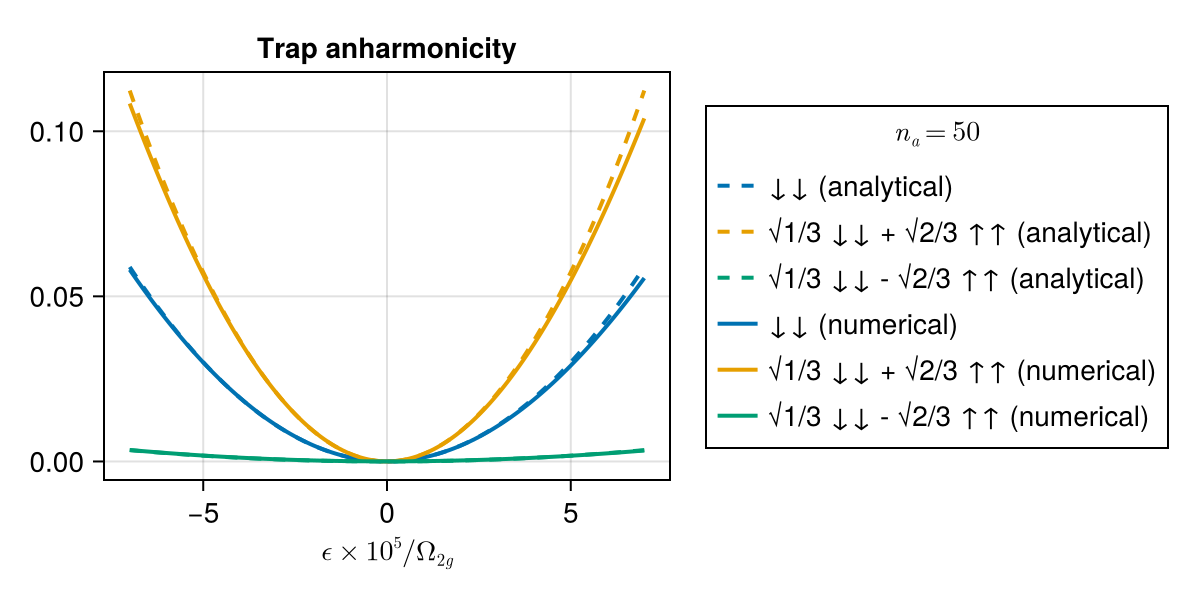

In [6]:
N = 80  
na = 50
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-5
ϵ=(-7:0.1:7)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\epsilon \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Trap anharmonicity")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_trap_anharmonicity(ϵ,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for ϵ in ϵ]
    lines!(ax,ϵ/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_trap_anharmonicity_numerical(1,ϵ,ψ0, progress_bar=Val(false))) for ϵ in ϵ]
    lines!(ax,ϵ/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Trap anharmonicity n_a=$na.svg", fig)
fig

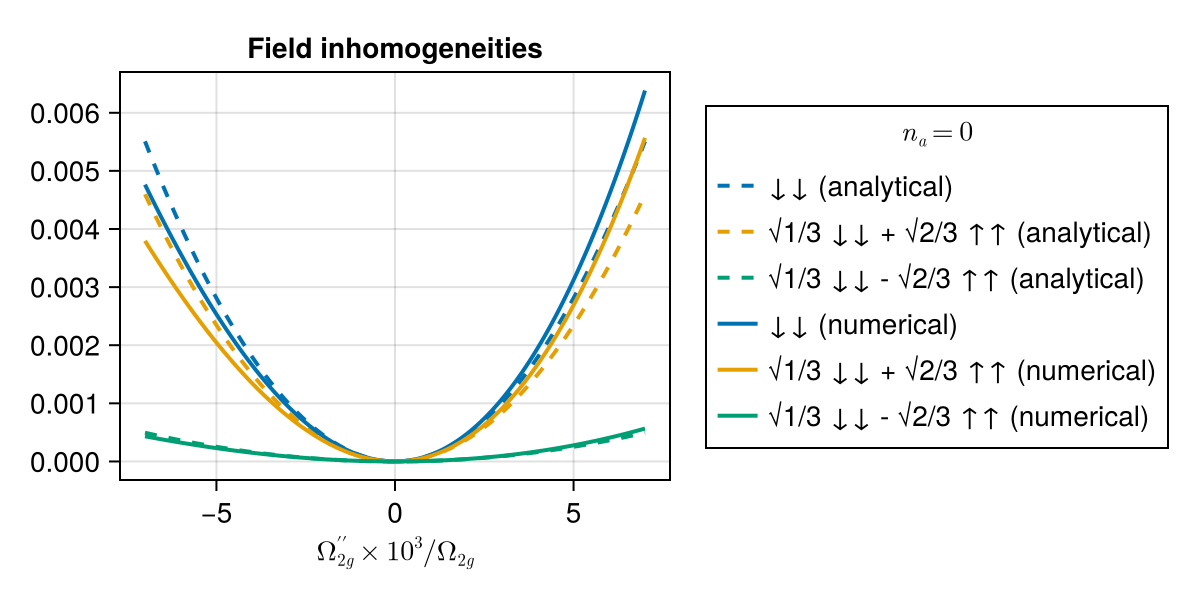

In [7]:
N = 30  
na=0
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-3
Ω2=(-7:0.1:7)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\Omega_{2g}^{\prime\prime} \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Field inhomogeneities")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_field_inhomogeneity(Ω2,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for Ω2 in Ω2]
    lines!(ax,Ω2/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_field_inhomogeneity_numerical(1,Ω2,ψ0, progress_bar=Val(false))) for Ω2 in Ω2]
    lines!(ax,Ω2/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Field inhomogeneities n_a=$na.svg", fig)
fig

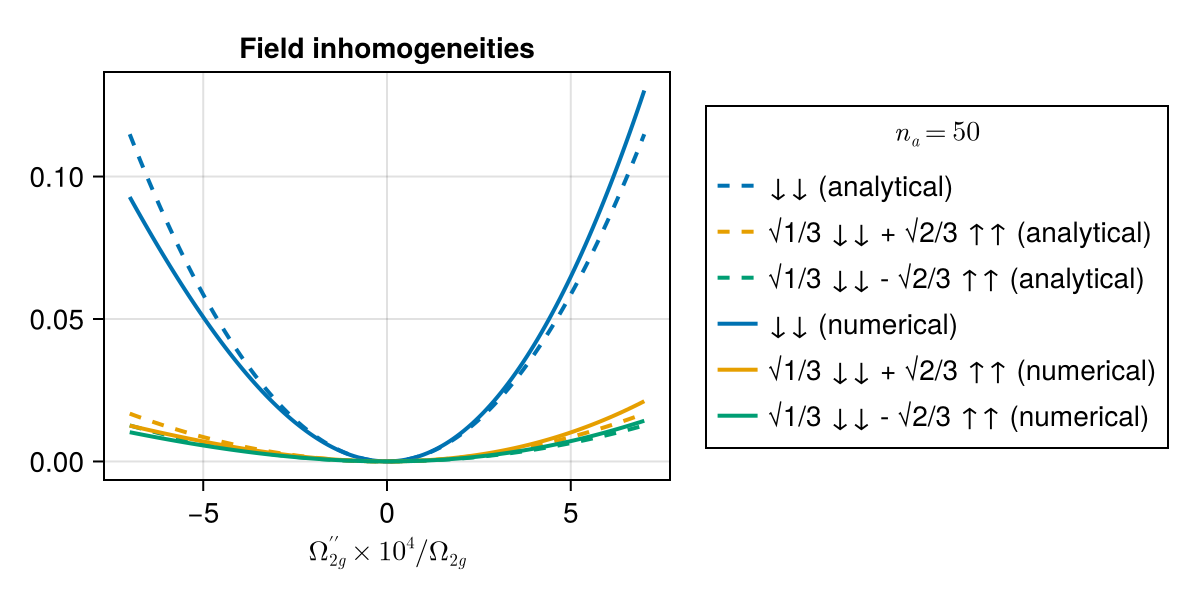

In [8]:
N = 80  
na=50
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-4
Ω2=(-7:0.1:7)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\Omega_{2g}^{\prime\prime} \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Field inhomogeneities")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_field_inhomogeneity(Ω2,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for Ω2 in Ω2]
    lines!(ax,Ω2/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_field_inhomogeneity_numerical(1,Ω2,ψ0, progress_bar=Val(false))) for Ω2 in Ω2]
    lines!(ax,Ω2/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Field inhomogeneities n_a=$na.svg", fig)
fig

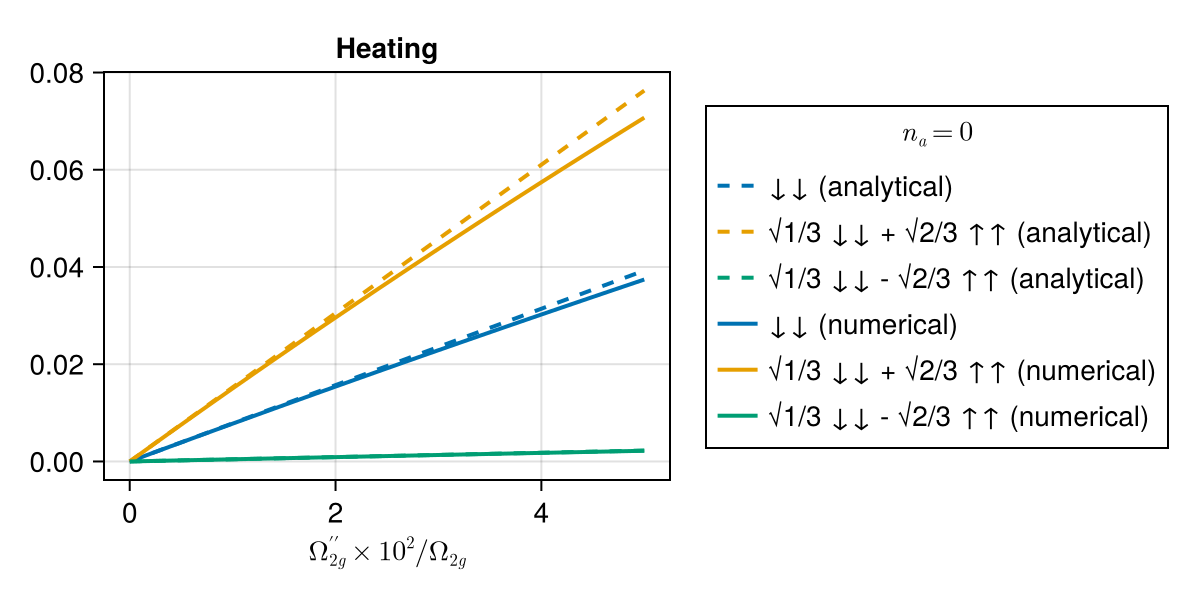

In [9]:
N = 30  
na=0
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-2
nh=(0:0.2:5)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\Omega_{2g}^{\prime\prime} \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Heating")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_heating(nh,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for nh in nh]
    lines!(ax,nh/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_heating_numerical(1,nh,ψ0, progress_bar=Val(false))) for nh in nh]
    lines!(ax,nh/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Heating n_a=$na.svg", fig)
fig

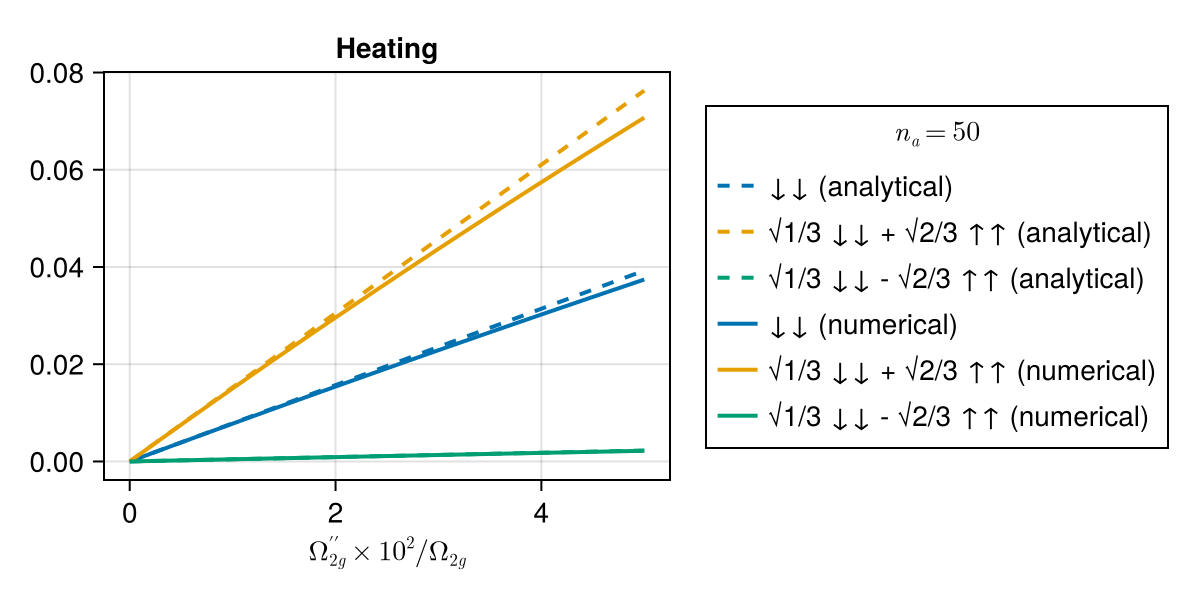

In [10]:
N = 80  
na=50
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-2
nh=(0:0.2:5)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\Omega_{2g}^{\prime\prime} \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Heating")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_heating(nh,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for nh in nh]
    lines!(ax,nh/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_heating_numerical(1,nh,ψ0, progress_bar=Val(false))) for nh in nh]
    lines!(ax,nh/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Heating n_a=$na.svg", fig)
fig

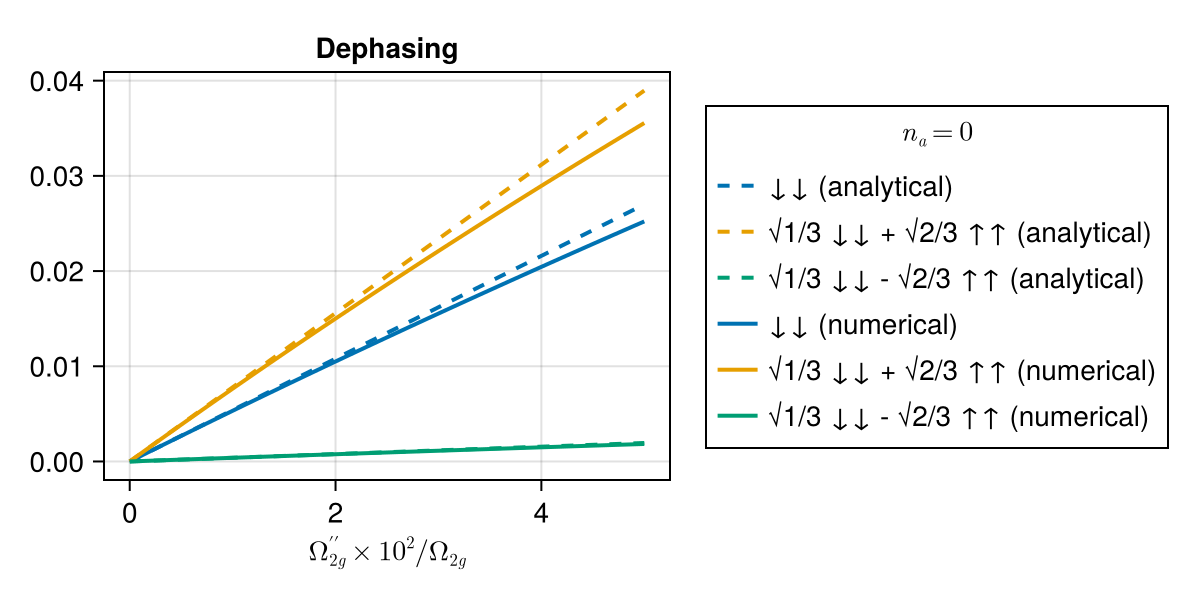

In [11]:
N = 30  
na=0
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-2
η=(0:0.1:5)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\Omega_{2g}^{\prime\prime} \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Dephasing")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_motional_dephasing(η,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for η in η]
    lines!(ax,η/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_motional_dephasing_numerical(1,η,ψ0, progress_bar=Val(false))) for η in η]
    lines!(ax,η/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Dephasing n_a=$na.svg", fig)
fig

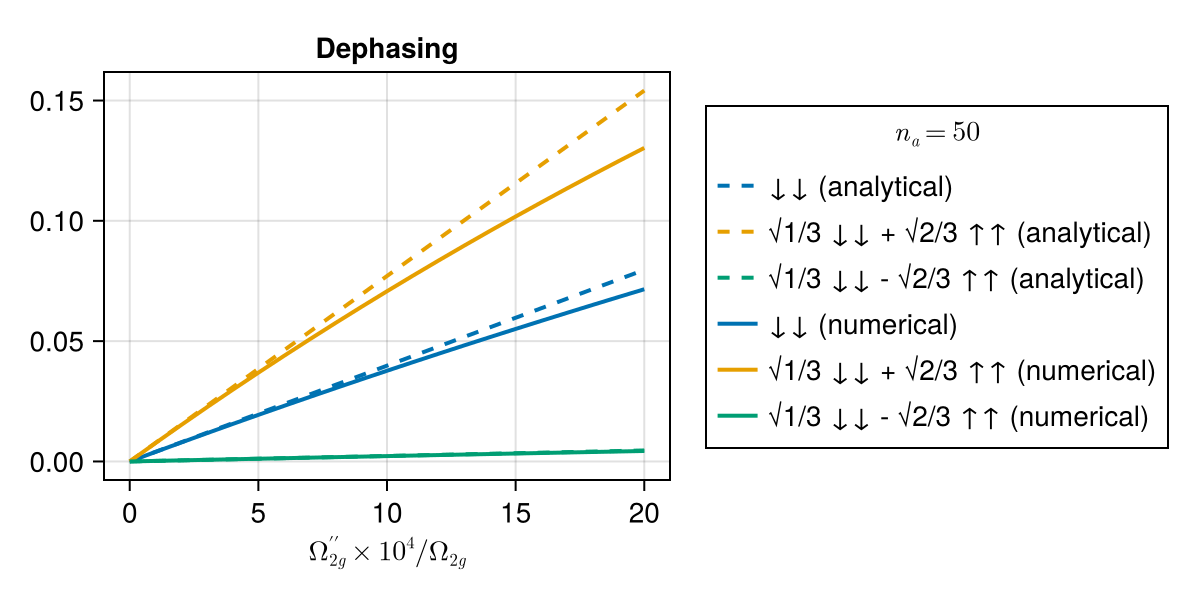

In [12]:
N = 80  
na=50
ψ01 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,na) #↓↓
ψ02= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na) #√1/3 ↓↓ + √2/3 ↑↑
ψ03= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) - sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,na); #√1/3 ↓↓ - √2/3 ↑↑
ψ0s= [ψ01, ψ02, ψ03];
ψ0strings=["↓↓", "√1/3 ↓↓ + √2/3 ↑↑", "√1/3 ↓↓ - √2/3 ↑↑"]
colors=colors = Makie.wong_colors()[1:3]
param_scale=1e-4
η=(0:1:20)*param_scale
Ω=1

Sx=sigmax() ⊗ qeye(2) + qeye(2) ⊗ sigmax() 


fig=Figure(size=(600,300))
ax=Axis(fig[1,1],xlabel=L"\Omega_{2g}^{\prime\prime} \times%$(latex_sci(1/param_scale)) / \Omega_{2g}",title="Dephasing")

# first calculate analytically
for (ψ0, ψ0string,color) in zip(ψ0s, ψ0strings,colors)
    infidelity_values = [real(infidelity_motional_dephasing(η,Ω,na,ptrace(ψ0,(1,2)),Sx,1)) for η in η]
    lines!(ax,η/param_scale, infidelity_values, label="$ψ0string (analytical)", linestyle=:dash,linewidth=2,color=color)
end

# then calculate numerically
for (ψ0, ψ0string, color) in zip(ψ0s, ψ0strings, colors)
    infidelity_values = [real(infidelity_motional_dephasing_numerical(1,η,ψ0, progress_bar=Val(false))) for η in η]
    lines!(ax,η/param_scale, infidelity_values, label="$ψ0string (numerical)",linewidth=2, color=color)
end

Legend(fig[1,2],ax,L"n_a=%$na")
save("../figs/sanity_check/Dephasing n_a=$na.svg", fig)
fig